# Practica 02

## 1. Empleando Matplotlib, representar las curvas de nivel de esta función y generar una gráfica como la siguiente
$$ g(x, y) = \cos{x} + \sin^2{y}$$

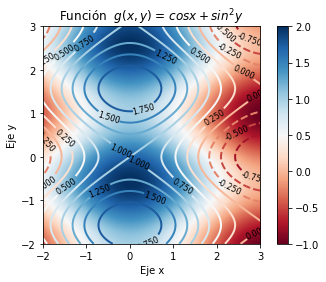

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, symbols
from pylab import imshow,cm
from sympy import init_session
import matplotlib as mpl
%matplotlib inline

def g(x,y): # funcion
    return np.cos(x) + (np.sin(y))**2

x = np.linspace(start=-2.0, stop=3.0,num=1000)  # array de valores x
y = np.linspace(start=-2.0, stop=3.0,num=1000)  # array de valores y
X, Y = np.meshgrid(x,y) # matriz de coordenadas
Z = g(X,Y) 

cmap = mpl.cm.RdBu
norm = mpl.colors.Normalize(vmin=-1, vmax=2)

levels = np.linspace(-1.0,2.0,num=13,endpoint=True) # niveles para el contorno y la barra de color
linestyles = np.arange(-1.0, 2.0, 0.25)  # estilos de linea, segun valor
linestyles = ['dashed' if v < 0 else 'solid' for v in linestyles]
cset = plt.contour(X,Y,Z,levels=levels,cmap=cmap,norm=norm,linewidths=2,linestyles=linestyles) # la f es de fill colour    
im = imshow(Z,cmap=cmap,norm=norm,extent=(-2.0, 3.0, -2.0, 3.0)) # dibujar la funcion
plt.clabel(cset,inline=True, colors='black', fontsize=8)  # etiquetas a las graficas de contorno 

plt.title(r"Función $\ g{(x,y)}$ = $cos{x}+sin^2{y}$")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.colorbar(im)
plt.show()


## Empleando el módulos Pandas y la carpeta data y el archivo model.txt brindado en clase.

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
 
# !head /data/model.txt
df = pd.read_fwf('data/model.txt',
                 skiprows=4,
                 usecols=(0,2,3,4,5,6),                 
                 names = ['FECHA','VELOC','GRADI','TC','DENSI','PRESI'],
                 parse_dates=['FECHA'],
                 dayfirst=True, # para un correcto parsing de fecha
                 index_col=['FECHA'] # indexar por fechas (Columna indice)
                ) # despues de 3 lineas, comienza el archivo
df.sort_index(inplace=True) # ordenar por index
df.head(6)
#df.dtypes

,VELOC,GRADI,TC,DENSI,PRESI
FECHA,,,,,
1984-01-01,20.8,243,7.3,1.25,1002.8
1984-01-01,20.8,243,7.3,1.25,1002.2
1984-01-01,20.6,243,7.4,1.24,1001.8
1984-01-01,20.4,244,7.5,1.24,1001.5
1984-01-01,20.3,245,7.5,1.24,1001.2
1984-01-01,20.4,245,7.6,1.24,1000.9


### a.Representar la matriz scatter de la velocidad y orientación del viento de los primeros mil registros.

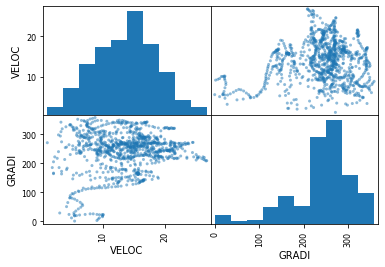

In [73]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(df.head(1000).loc[:,'VELOC':'GRADI'])

### b. Histograma de la velocidad del viento con 36 particiones

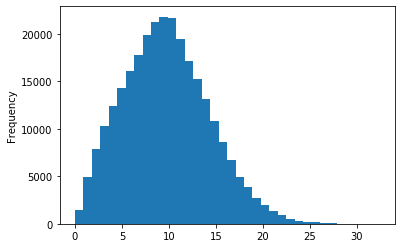

In [101]:
df.VELOC.plot.hist(bins=36)

### c. Histórico de la velocidad media, con los datos agrupados por años y meses

In [99]:
df['ANHO']  = df.index.year
df['MES'] = df.index.month
monthly = df.groupby(by=['MES','ANHO']) # nueva agrupacion por año y mes 
df.describe() # describir datos 
monthly_mean = monthly.mean() # media mensual de los datos
monthly_mean.VELOC.reset_index().pivot(index='ANHO',columns='MES') # historico, por anho y mes

VELOC                                                         \
MES          1          2          3          4          5          6    
ANHO                                                                     
1984  13.821505  10.043534   8.708199   7.939583   8.283871   7.330833   
1985  10.424059   8.649851   9.097043  10.895833   9.147984   8.583056   
1986  13.830972  10.303423  10.832527   9.217222  11.092742   9.570000   
1987   8.762231   9.502530  10.386962   9.063056   9.670161   7.983889   
1988  12.345430  13.447557  10.783333   8.511806   9.107661   7.594167   
1989   9.891935  12.448958  11.776478   9.206944   8.491667   7.417083   
1990  13.390726  16.317262  11.582661   9.273889   7.007796   8.217778   
1991  11.082124   8.971131   9.425000  10.917083   8.013441  10.012361   
1992   9.519624   9.928879  11.797849   9.496667   9.234140   7.170139   
1993  13.553629   8.300298   9.620296   9.226944  10.691801   7.086528   
1994  12.743817   9.300446  13.058468  10.817361   8.309677   8.898056   
1995  14.024866  13.239137  12.197043   9.416944   7.321909   9.166389   
1996  10.754839  11.089511   8.685753   8.493611  10.265726   7.620417   
1997   8.347715  14.924107   9.867876   8.124444   8.584274   9.646667   
1998  13.109677  11.514286  10.942339   9.500417   8.895833  10.409583   
1999  12.528763  11.269048   8.439247   9.330000   9.694220   7.580694   
2000  11.494892  12.468247  10.172715   9.103472   8.910349   8.529167   
2001  10.253495   9.584673   9.664516  10.243333   9.074731   8.480000   
2002  11.843817  14.686756   9.946237   9.673611  10.154435   8.813611   
2003  11.521909   9.675744   8.608065   9.995833   9.328091   7.710972   
2004  12.250134  11.419828  10.138710   7.813889   6.522446   8.699167   
2005  13.587500  10.366071   9.831720   8.748194   9.718414   7.874444   
2006   9.297984  10.054167  10.873118   9.237639   9.704032   6.799444   
2007  14.101075   9.645387  10.546640   8.262500   9.168145   8.840694   
2008  14.116129   9.943103  12.370161   9.460139   9.980376   7.843889   
2009  10.223387   8.581101   9.415591   8.026250   9.916532   6.409583   
2010   8.289919   9.695387   9.692876   7.802083   7.061559   7.421528   
2011  10.500941  11.319940   8.006317   8.849028   9.512500   9.312500   
2012  11.287500   9.791810   7.621102   9.605000   9.024597  10.365000   
2013   9.740323   9.398512   9.320027  10.267222   9.640860   9.429167   
2014  12.961156  14.528125   9.064785   8.428750   8.235349   6.188056   
2015  12.050134  10.035863  10.561156   8.027083   9.739382   9.018056   

                                                                        
MES          7          8          9          10         11         12  
ANHO                                                                    
1984   7.710618   7.324194   9.335694  10.985215  10.789306   9.600941  
1985   8.865860  10.379704   8.181250   8.021640  10.734167  12.567339  
1986   6.824866   8.847043   7.099028  10.331855  12.446944  13.712500  
1987   7.672312   7.507796   8.731528  10.418011   9.445417  10.355376  
1988  10.986022   8.857124  10.319167   9.518683   8.726111  11.036559  
1989   7.892876   8.117876   8.210139  11.445430   9.406389   9.345430  
1990   8.460618   7.672581   8.973333  12.126210   9.382361  12.120161  
1991   8.981317   7.620565   7.437778   9.339382  11.320278   9.228898  
1992   7.781048  10.290054   9.600278  10.010215  12.911806   9.820027  
1993   8.857527   8.148925   8.027778   9.998925   8.559306  13.214651  
1994   7.125806   8.196505   9.523194   9.311290   9.085000  12.423925  
1995   8.548118   8.264382   8.653056   9.555376  10.049861   8.207661  
1996   8.129167   9.162634   9.287639  10.456048  11.589306   9.658468  
1997   7.433871   7.436156   8.018889   9.434005  10.480139  11.958468  
1998   9.251882   8.233871   9.785556  13.341532   9.758194  12.096640  
1999   8.846640   7.202285   9.258333  10.698253  11.538472  13.665591  
2000   7.106048   6.768145   9.4